In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get the Data

In [2]:
monday_data = pd.read_csv('./data/monday.csv', sep=';', parse_dates=['timestamp'])
monday_data

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [3]:
monday_data.dtypes

timestamp      datetime64[ns]
customer_no             int64
location               object
dtype: object

### 1. Calculate the total number of customers in each section

In [4]:
total_cust_per_section = pd.DataFrame(monday_data.groupby('location')['customer_no'].count())
total_cust_per_section

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


<AxesSubplot:xlabel='location'>

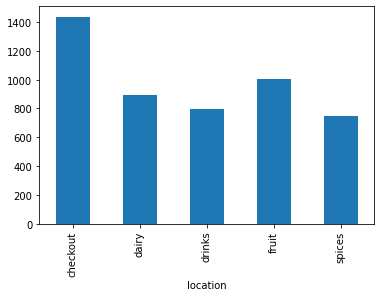

In [5]:
monday_data.groupby('location')['customer_no'].count().plot.bar()

### 2. Calculate the total number of customers in each section over time

In [6]:
# y = pd.get_dummies(monday_data.location)
y = pd.get_dummies(monday_data['location'])
y

,checkout,dairy,drinks,fruit,spices
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
4879,1,0,0,0,0
4880,1,0,0,0,0
4881,0,1,0,0,0
4882,0,1,0,0,0


In [7]:
df = pd.concat([monday_data, y], axis=1)
df

,timestamp,customer_no,location,checkout,dairy,drinks,fruit,spices
0,2019-09-02 07:03:00,1,dairy,0,1,0,0,0
1,2019-09-02 07:03:00,2,dairy,0,1,0,0,0
2,2019-09-02 07:04:00,3,dairy,0,1,0,0,0
3,2019-09-02 07:04:00,4,dairy,0,1,0,0,0
4,2019-09-02 07:04:00,5,spices,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout,1,0,0,0,0
4880,2019-09-02 21:49:00,1444,checkout,1,0,0,0,0
4881,2019-09-02 21:49:00,1445,dairy,0,1,0,0,0
4882,2019-09-02 21:50:00,1446,dairy,0,1,0,0,0


In [8]:
cust_time_per_section = monday_data.groupby('timestamp')['location'].value_counts().unstack().fillna(0)
cust_time_per_section

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-02 07:03:00,0.0,2.0,0.0,0.0,0.0
2019-09-02 07:04:00,0.0,2.0,0.0,1.0,3.0
2019-09-02 07:05:00,2.0,1.0,1.0,0.0,0.0
2019-09-02 07:06:00,2.0,2.0,1.0,2.0,1.0
2019-09-02 07:07:00,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...
2019-09-02 21:46:00,1.0,0.0,2.0,1.0,2.0
2019-09-02 21:47:00,2.0,2.0,0.0,2.0,0.0
2019-09-02 21:48:00,2.0,2.0,2.0,0.0,1.0


### 3. Display the number of customers at checkout over time

<AxesSubplot:xlabel='timestamp'>

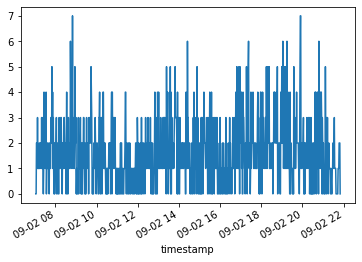

In [9]:
cust_time_per_section['checkout'].plot()

### 4. Calculate the time each customer spent in the market

In [10]:
time_spent_by_cust = monday_data.sort_values(by=['customer_no', 'timestamp'])
time_spent_by_cust                                                 

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
8,2019-09-02 07:05:00,1,checkout
1,2019-09-02 07:03:00,2,dairy
12,2019-09-02 07:06:00,2,checkout
2,2019-09-02 07:04:00,3,dairy
...,...,...,...
4874,2019-09-02 21:48:00,1444,spices
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [11]:
time_spent_by_cust['total_time_spent'] = time_spent_by_cust.groupby('customer_no')['timestamp'].diff()
time_spent_by_cust

,timestamp,customer_no,location,total_time_spent
0,2019-09-02 07:03:00,1,dairy,NaT
8,2019-09-02 07:05:00,1,checkout,0 days 00:02:00
1,2019-09-02 07:03:00,2,dairy,NaT
12,2019-09-02 07:06:00,2,checkout,0 days 00:03:00
2,2019-09-02 07:04:00,3,dairy,NaT
...,...,...,...,...
4874,2019-09-02 21:48:00,1444,spices,NaT
4880,2019-09-02 21:49:00,1444,checkout,0 days 00:01:00
4881,2019-09-02 21:49:00,1445,dairy,NaT
4882,2019-09-02 21:50:00,1446,dairy,NaT


In [12]:
# Time spent in "Minutes" by each customer in the Market

time_spent_by_cust.groupby('customer_no')['total_time_spent'].sum()

customer_no
1      0 days 00:02:00
2      0 days 00:03:00
3      0 days 00:02:00
4      0 days 00:04:00
5      0 days 00:01:00
             ...      
1443   0 days 00:01:00
1444   0 days 00:01:00
1445   0 days 00:00:00
1446   0 days 00:00:00
1447   0 days 00:00:00
Name: total_time_spent, Length: 1447, dtype: timedelta64[ns]

### 5. Calculate the total number of customers in the supermarket over time

In [13]:
time_spent_by_cust.groupby('timestamp')['customer_no'].nunique()

timestamp
2019-09-02 07:03:00    2
2019-09-02 07:04:00    6
2019-09-02 07:05:00    4
2019-09-02 07:06:00    8
2019-09-02 07:07:00    4
                      ..
2019-09-02 21:46:00    6
2019-09-02 21:47:00    6
2019-09-02 21:48:00    7
2019-09-02 21:49:00    7
2019-09-02 21:50:00    2
Name: customer_no, Length: 874, dtype: int64

### 6. Plot the distribution of customers of their first visited section versus following sections.
        (treat all sections visited after the first as “following”)

In [14]:
time_spent_by_cust['first_sec'] = time_spent_by_cust['total_time_spent'].isna()
first_section = time_spent_by_cust.loc[time_spent_by_cust['first_sec']]['location'].value_counts(normalize=True)
first_section

fruit     0.359364
dairy     0.284727
spices    0.195577
drinks    0.160332
Name: location, dtype: float64

In [15]:
following_section = time_spent_by_cust.loc[~time_spent_by_cust['first_sec']]['location'].value_counts(normalize=True)
following_section

checkout    0.418097
drinks      0.164388
fruit       0.141111
dairy       0.140530
spices      0.135874
Name: location, dtype: float64

### Drop columns which are not needed and set 'timestamp' as (Index) for 'Resampling the time'

In [16]:
time_spent_by_cust

,timestamp,customer_no,location,total_time_spent,first_sec
0,2019-09-02 07:03:00,1,dairy,NaT,True
8,2019-09-02 07:05:00,1,checkout,0 days 00:02:00,False
1,2019-09-02 07:03:00,2,dairy,NaT,True
12,2019-09-02 07:06:00,2,checkout,0 days 00:03:00,False
2,2019-09-02 07:04:00,3,dairy,NaT,True
...,...,...,...,...,...
4874,2019-09-02 21:48:00,1444,spices,NaT,True
4880,2019-09-02 21:49:00,1444,checkout,0 days 00:01:00,False
4881,2019-09-02 21:49:00,1445,dairy,NaT,True
4882,2019-09-02 21:50:00,1446,dairy,NaT,True


In [17]:
time_spent_by_cust.drop(columns=['total_time_spent', 'first_sec'], inplace=True)
time_spent_by_cust.set_index('timestamp', inplace=True)
time_spent_by_cust

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:05:00,1,checkout
2019-09-02 07:03:00,2,dairy
2019-09-02 07:06:00,2,checkout
2019-09-02 07:04:00,3,dairy
...,...,...
2019-09-02 21:48:00,1444,spices
2019-09-02 21:49:00,1444,checkout
2019-09-02 21:49:00,1445,dairy


In [18]:
# shows One customer has been to which all sections that particular day

monday_resampled = time_spent_by_cust.groupby('customer_no').resample('1T').ffill()
monday_resampled.drop(columns=['customer_no'], inplace=True)
monday_resampled

location
customer_no timestamp                    
1           2019-09-02 07:03:00     dairy
            2019-09-02 07:04:00     dairy
            2019-09-02 07:05:00  checkout
2           2019-09-02 07:03:00     dairy
            2019-09-02 07:04:00     dairy
...                                   ...
1444        2019-09-02 21:48:00    spices
            2019-09-02 21:49:00  checkout
1445        2019-09-02 21:49:00     dairy
1446        2019-09-02 21:50:00     dairy
1447        2019-09-02 21:50:00     fruit

[10765 rows x 1 columns]

In [19]:
monday_resampled['next_location'] = monday_resampled.groupby('customer_no')['location'].shift(-1)
monday_resampled['next_location'].fillna(value='checkout', inplace=True)
monday_resampled

location next_location
customer_no timestamp                                  
1           2019-09-02 07:03:00     dairy         dairy
            2019-09-02 07:04:00     dairy      checkout
            2019-09-02 07:05:00  checkout      checkout
2           2019-09-02 07:03:00     dairy         dairy
            2019-09-02 07:04:00     dairy         dairy
...                                   ...           ...
1444        2019-09-02 21:48:00    spices      checkout
            2019-09-02 21:49:00  checkout      checkout
1445        2019-09-02 21:49:00     dairy      checkout
1446        2019-09-02 21:50:00     dairy      checkout
1447        2019-09-02 21:50:00     fruit      checkout

[10765 rows x 2 columns]

## Transition Matrix

In [20]:
M = pd.crosstab(monday_resampled['location'], monday_resampled['next_location'], normalize='index')
M

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.089843,0.743920,0.062375,0.051502,0.052361
drinks,0.208109,0.011236,0.610650,0.090865,0.079140
fruit,0.206411,0.087959,0.050821,0.607115,0.047694
spices,0.145765,0.191368,0.176710,0.096906,0.389251


In [21]:
# storing transition matrix in a csv file

M.to_csv('./transition_matrix.csv')

### Plotting the Transition Matrix 'M'

In [22]:
import pygraphviz as pgv

sections = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']

# initialize the graph
G = pgv.AGraph(strict=False, directed=True)

# loop over all pairs of states
for state_from in sections:
    for state_to in sections:
        # get the transition probability
        proba = M.loc[state_from, state_to]
        # draw into the graph if the probability is larger than Zero
        if proba > 0:
            G.add_edge(state_from, state_to, label=np.round(proba, 2))
            
# write the graph to hard drive
G.draw('transition.png', prog='dot')

### 7. Estimate the total revenue for a customer using the following table:
    section    revenue per minute
    -------    ------------------
    - fruit          4€
    - spices         3€
    - dairy          5€
    - drinks         6€

### 8. Which is the most profitable section according to your data?